In [2]:
from glob import glob
import os
import pandas as pd
import numpy as np
import re
from PIL import Image
from random import randrange
import pydicom
import matplotlib.pyplot as plt

In [3]:
#checnking the input files
#--- For Windows ---#
print(os.listdir("D:\\kaggle\\rsna"))
rootDir = "D:\\kaggle\\rsna"

#--- For Unix ---#
#print(os.listdir("/Users/Sanketh/Dropbox/Research/kaggle"))
#rootDir = "/users/Sanketh/Dropbox/Research/kaggle"

['stage_1_sample_submission.csv', 'stage_1_test_images', 'stage_1_train.csv', 'stage_1_train_images']


In [16]:
#reading all dcm files into train and text
train = os.path.join(rootDir, "train")
train = sorted(glob(train+'\\*.dcm'))
#train = sorted(glob(train+'\\*.dcm'))

valid = os.path.join(rootDir, "test")
valid = os.listdir(valid)
#valid = sorted(glob(valid+'\\*.dcm'))

print("train files: ", train[0])
print("valid files: ", valid[0])

pd.reset_option('max_colwidth')

train files:  D:\kaggle\rsna\train\ID_000039fa0.dcm
valid files:  ID_000012eaf.dcm


In [5]:
train_df = pd.read_csv(os.path.join(rootDir,'stage_1_train.csv'))

In [6]:
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 

In [7]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [8]:
case = 5

data = pydicom.dcmread(train[case])

#print(data)
window_center , window_width, intercept, slope = get_windowing(data)


#displaying the image
img = pydicom.read_file(train[case]).pixel_array

img = window_image(img, window_center, window_width, intercept, slope)

In [9]:
print(img.shape)

(512, 512)


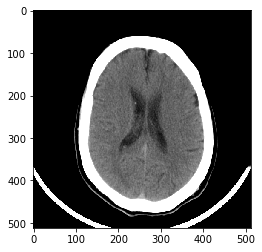

In [11]:
plt.imshow(img, cmap='gray')